<a href="https://colab.research.google.com/github/AgungPambudi/data-science/blob/main/Tugas_Mandiri_Pertemuan_11_Agung_Pambudi_Universitas_Gadjah_Mada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 11
---
Pertemuan 11 (sebelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun Model 2 (Regresi Non Linier, Support Vector Machine, dll). silakan Anda kerjakan Latihan 1 s/d 20. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

# About Iris dataset
![](https://www.oreilly.com/library/view/python-artificial-intelligence/9781789539462/assets/462dc4fa-fd62-4539-8599-ac80a441382c.png)


The iris dataset contains the following data **(Before Cleansing)**
* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
* The format for the data: (sepal length, sepal width, petal length, petal width)

### The variables are:
![](https://i.imgur.com/PQqYGaW.png)
* sepal_length: Sepal length, in centimeters, used as input.
* sepal_width: Sepal width, in centimeters, used as input.
* petal_length: Petal length, in centimeters, used as input.
* petal_width: Petal width, in centimeters, used as input.
* class: Iris Setosa, Versicolor, or Virginica, used as the target.

# Contents
### Data Preprocessing
* Include Libraries
* Import DataSet
* Handle Missing Value *(sudah dilakukan pada pert 8)*

### Data Visualization
* Scatterplot
* Pairplot
* Barplot
* Violin
* Areaplot
* Correlation

### Feature Engineering

### Machine learning Model (Regresi Non Linier, Support Vector Machine, dll)
* Logistic Regression
* Naive Bayes
* KNN
* Support Vector Machine


# 1. Data Preprocessing

# Latihan (1)

### Melakukan import library yang dibutuhkan

In [ ]:
# import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib dan seaborn untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# me-non aktifkan peringatan pada python
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Panggil file (load file bernama CarPrice_Assignment.csv) dan simpan dalam dataframe
dataset = "/content/drive/MyDrive/Agung Pambudi - Associate Data Scientist/Tugas-Mandiri_Pertemuan-11/Iris_AfterClean.csv"
iris = pd.read_csv(dataset)

# Latihan (2)

### Review Dataset

In [ ]:
# tampilkan 5 baris awal dataset dengan function head()
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,3.6,1.4,0.2,Iris-setosa
2,5.4,3.9,1.7,0.4,Iris-setosa
3,4.9,3.1,1.5,0.1,Iris-setosa
4,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
# tampilkan unique value dari species
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

dari output diatas, dataset ini memiliki tiga varietas tanaman Iris.

In [ ]:
# melihat statistik data untuk data numeric dan non numeric
iris.describe(include = "all")

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,140.000000,140.000000,140.000000,140.000000,140
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.902857,3.028571,3.910714,1.262857,NaN
std,0.819365,0.398791,1.720369,0.746825,NaN
min,4.300000,2.200000,1.000000,0.100000,NaN
25%,5.200000,2.800000,1.675000,0.400000,NaN
50%,5.850000,3.000000,4.500000,1.400000,NaN
75%,6.425000,3.300000,5.100000,1.800000,NaN


In [ ]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  140 non-null    float64
 1   SepalWidthCm   140 non-null    float64
 2   PetalLengthCm  140 non-null    float64
 3   PetalWidthCm   140 non-null    float64
 4   Species        140 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


Seperti yang kita lihat di atas distribusi titik data di setiap kelas adalah sama sehingga Iris adalah dataset seimbang

# Latihan (3)

### Checking if there are any missing values


![](https://blogs.worldbank.org/sites/default/files/opendata/missing-data.jpg)

In [ ]:
# cek jumlah nilai yang hilang / missing values dari setiap kolom dengan function isnull() dan sum()
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

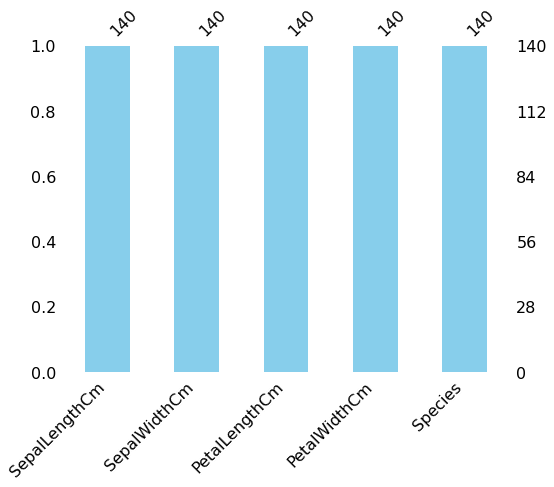

In [ ]:
# cek missing values dengan visualisasi menggunakan library: Missingno adalah pustaka khusus untuk menampilkan nilai yang hilang dalam kerangka data
# jenis: barchart
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

Dataset IrisAfterclean.csv ini adalah dataset yang telah melewati proses cleansing pada pertemuan 8 kemarin sehingga dataset ini sudah bersih

# 2. Data Visualization

## 2.1 Scatter Plot

Scatter plot adalah visualisasi data dua dimensi yang menggunakan titik untuk mewakili nilai yang diperoleh untuk dua variabel berbeda, satu diplot sepanjang sumbu x dan yang lainnya diplot sepanjang sumbu y. Kita dapat memplot scatter plot di antara dua fitur.

# Latihan (4)

###  buat visualisasi scatter plot 'Sepal Length' dan  'Sepal Width'

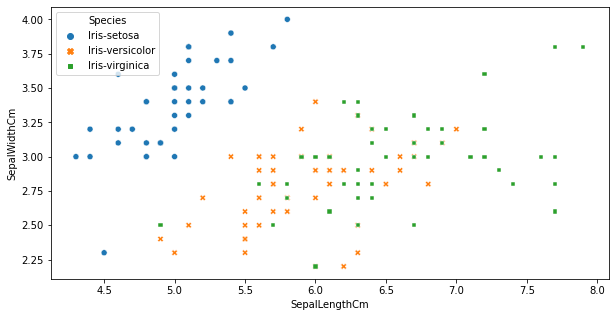

In [ ]:
# visualisasi scatter plot dengan seaborn antara Sepal Length dan Sepal Width dengan parameter hue dan style='species'
g=sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.figure.set_size_inches(10,5)
plt.show()

###  buat visualisasi scatter plot 'Petal Length' dan  'Petal Width'

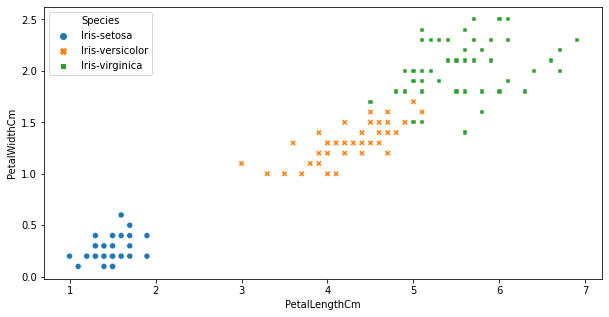

In [ ]:
# visualisasi scatter plot dengan seaborn antara Petal Length dan Petal Width dengan parameter hue dan style='species'
g=sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.figure.set_size_inches(10,5)
plt.show()

Seperti yang dapat kita lihat bahwa Fitur Petal memberikan pembagian cluster yang lebih baik dibandingkan dengan fitur Sepal. Ini merupakan indikasi bahwa Petal dapat membantu dalam Prediksi yang lebih baik dan akurat dari pada Sepal.

## 2.2 Pairplot
Pair Plots adalah cara yang sangat sederhana (satu baris kode sederhana!) untuk memvisualisasikan hubungan antara setiap variabel. Ini menghasilkan matriks hubungan antara setiap variabel dalam data kita untuk pemeriksaan data instan. Pair Plots memberikan scatter plot dari fitur yang berbeda. Pair Plots untuk kumpulan data iris.

# Latihan (5)

###  buat visualisasi Pair Plots dari data iris

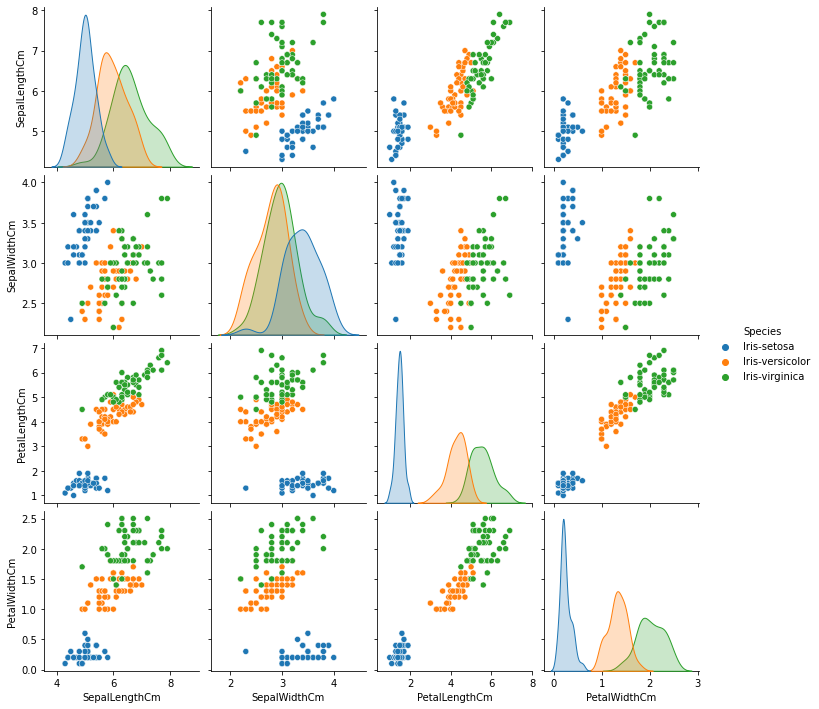

In [ ]:
# buat visualisasi Pair Plots dari data iris dengan parameter hue='species'
sns.pairplot(data=iris,hue='Species')
plt.show()

dari grafik kita dapat melihat scatter plot antara dua fitur dan distribusinya, dari sebaran di atas petal length memisahkan iris setosa dari yang tersisa, dari plot antara petal length dan petal width kita dapat memisahkan bunga


## 2.3 BoxPlot
boxplot adalah cara standar untuk menampilkan distribusi data berdasarkan ringkasan lima angka ("minimum", kuartil pertama (Q1), median, kuartil ketiga (Q3), dan "maksimum"). Ini dapat memberi tahu kita tentang outlier dan apa nilainya. Ini juga dapat memberi tahu kita apakah data kita simetris, seberapa ketat data kita dikelompokkan, dan bagaimana jika data kita miring.

![](https://miro.medium.com/proxy/1*2c21SkzJMf3frPXPAR_gZA.png)

# Latihan (6)

###  buat visualisasi box plot dari setiap kolom feature terhadap species

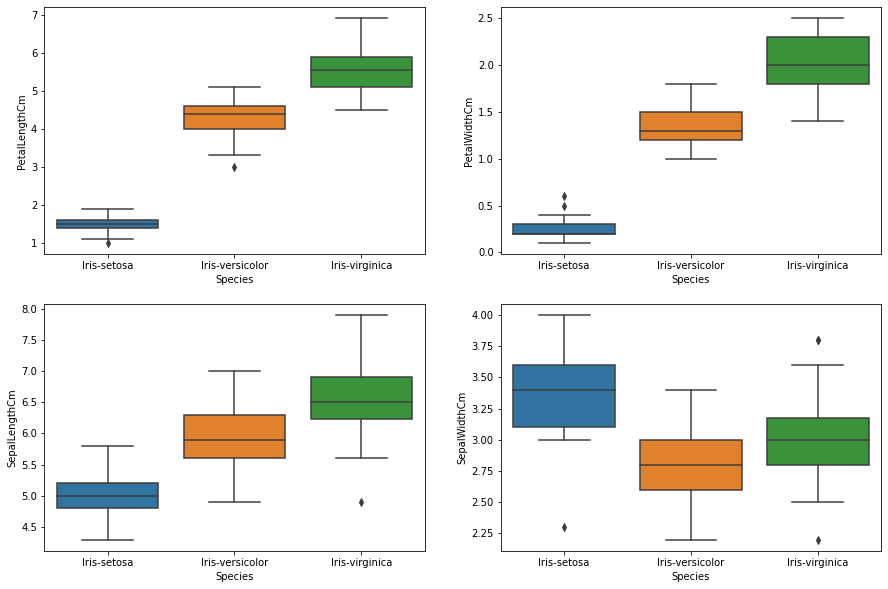

In [ ]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

# Latihan (7)

###  buat visualisasi box plot distribusi setiap kolom feature

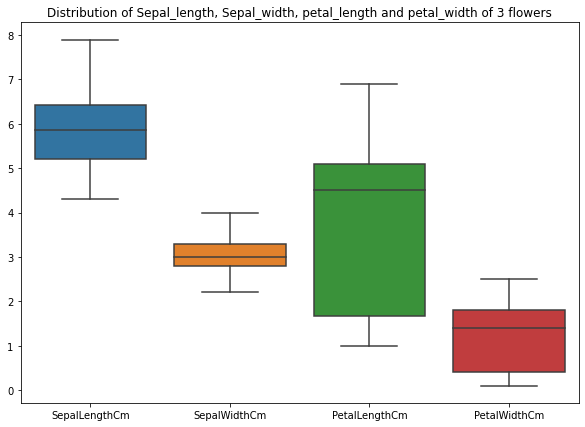

In [ ]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

## 2.4 Violin

Violin Plot adalah metode untuk memvisualisasikan distribusi data numerik dari variabel yang berbeda. Ini mirip dengan Box Plot tetapi dengan plot yang diputar di setiap sisi, memberikan lebih banyak informasi tentang perkiraan kepadatan pada sumbu y. Kepadatan dicerminkan dan dibalik dan bentuk yang dihasilkan diisi, menciptakan gambar yang menyerupai biola. Kelebihan dari Violin Plot adalah dapat menampilkan nuansa dalam distribusi yang tidak terlihat dalam boxplot. Di sisi lain, boxplot lebih jelas menunjukkan outlier dalam data.

# Latihan (8)

###  buat visualisasi violin plot setiap kolom feature

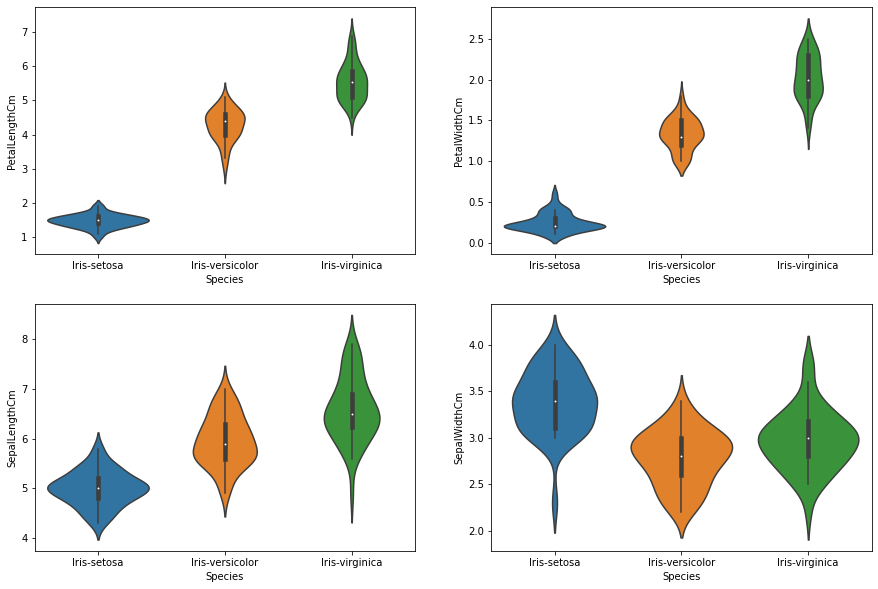

In [ ]:
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

# Latihan (9)

###  buat visualisasi violin plot dengan swarm plot

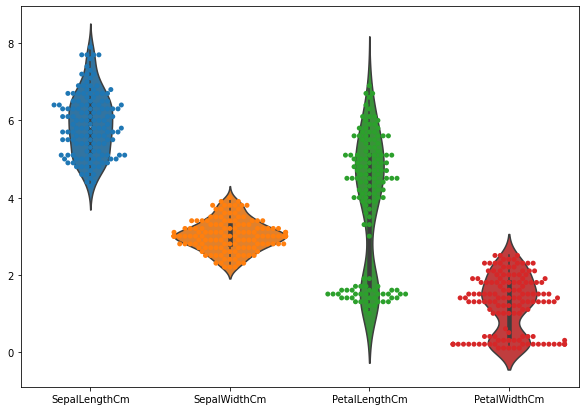

In [ ]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot(data=iris)
plt.show()

## 2.5 Area Plot

Area Plot memberi kita representasi visual dari Berbagai dimensi bunga Iris dan jangkauannya dalam dataset.

# Latihan (10)

###  buat visualisasi area plot pada setiap feature kolom

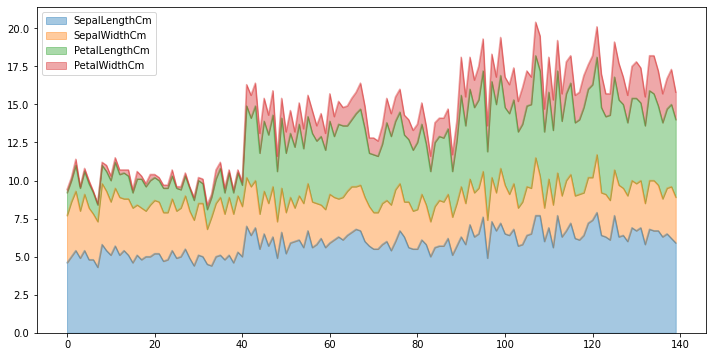

In [ ]:
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

## 2.6 Correlation
![](https://www.mathsisfun.com/data/images/correlation-examples.svg)

Sekarang, ketika kami melatih algoritma apa pun, jumlah fitur dan korelasinya memainkan peran penting. Jika ada fitur dan banyak fitur yang sangat berkorelasi, maka melatih suatu algoritma dengan semua fitur akan mengurangi akurasi. Dengan demikian pemilihan fitur harus dilakukan dengan hati-hati. Dataset ini memiliki fitur yang lebih sedikit tetapi kita masih akan melihat korelasinya.

# Latihan (11)

###  lihat korelasi dataset dan visualisasi dengan heatmap pada feature kolom

In [ ]:
# lihat korelasi dengan function corr()
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.095146,0.871080,0.810336
SepalWidthCm,-0.095146,1.000000,-0.388439,-0.317683
PetalLengthCm,0.871080,-0.388439,1.000000,0.958657
PetalWidthCm,0.810336,-0.317683,0.958657,1.000000


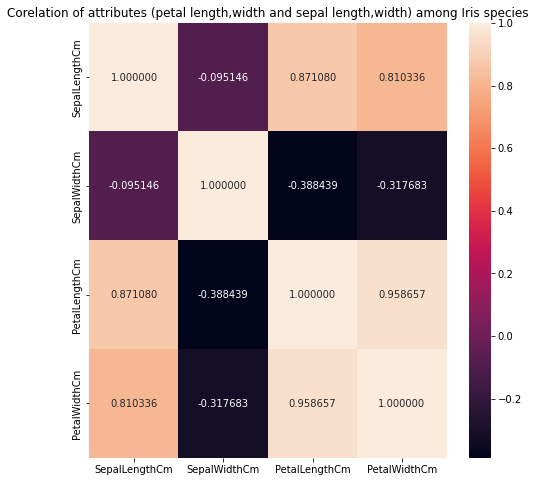

In [ ]:
# lihat korelasi dengan visualisasi heatmap
plt.figure(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

### Observasi :

Sepal Width dan Sepal Length tidak berkorelasi || Petal Width and Petal Length sangat berkorelasi

Kami akan menggunakan semua fitur untuk melatih algoritme dan memeriksa keakuratannya.

## Dividing data into features and labels
![](https://miro.medium.com/max/1002/1*68H8EsCwfqJNxzYdPYtEDw.png)

Seperti yang kita lihat, dataset berisi lima kolom: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm dan Species. Fitur yang sebenarnya dijelaskan oleh kolom 1-4. Kolom terakhir berisi label sampel. Pertama kita perlu membagi data menjadi dua array: X (fitur) dan y (label).

# Latihan (12)

### definisi variabel X(feature kolom) dan y(species/label):

In [ ]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

## Label encoding
![](https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png)


Seperti yang kita lihat, label bersifat kategoris. KNeighborsClassifier tidak menerima label string. Kita perlu menggunakan LabelEncoder untuk mengubahnya menjadi angka. Iris-setosa sesuai dengan 0, Iris-versicolor sesuai dengan 1 dan Iris-virginica sesuai dengan 2.

# Latihan (13)

### transform label data species dengan menggunakan library LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Building Machine Learning Models

# Latihan (14)

### import library dalam kebutuhan membangun model

In [ ]:

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import libarary Support Vector Machines dan linier Support Vector Machines
from sklearn.svm import SVC, LinearSVC

# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

### Splitting The Data into Training And Testing Dataset
![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu. Train data digunakan untuk fit model machine learning, sedangkan test data digunakan untuk mengevaluasi hasil fit model tersebut.






Python memiliki library yang dapat mengimplementasikan train/test split dengan mudah yaitu Scikit-Learn. Untuk menggunakannya, kita perlu mengimport Scikit-Learn terlebih dahulu, kemudian setelah itu kita dapat menggunakan fungsi train_test_split().

# Latihan (15)

### split data train dan test dengan function train_test_split() dengan train_size=0.7, test_size=0.3 dan random_state=0

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


Sekarang kita akan melatih beberapa model Machine Learning dan membandingkan hasilnya. Perhatikan bahwa karena set data tidak memberikan label untuk set pengujiannya, kita perlu menggunakan prediksi pada set pelatihan untuk membandingkan algoritme satu sama lain.

### 3.2 Logistic Regression:

Logistic Regression adalah algoritma Machine Learning yang digunakan untuk masalah klasifikasi, ini adalah algoritma analisis prediktif dan berdasarkan konsep probabilitas.

Kita dapat menyebut Logistic Regression sebagai model Regresi Linier tetapi Regresi Logistik menggunakan fungsi biaya yang lebih kompleks, fungsi biaya ini dapat didefinisikan sebagai 'fungsi Sigmoid' atau juga dikenal sebagai 'fungsi logistik' daripada fungsi linier.


![](https://miro.medium.com/max/570/1*50TdLe6f_AW8wnBBkyLYgw.png)

### Bangun model LogisticRegression dan akurasi nya

In [ ]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[12  0  0]
 [ 0 14  1]
 [ 0  1 14]]
accuracy_Logistic Regression : 0.952
precision_Logistic Regression : 0.952
recall_Logistic Regression: 0.952
f1-score_Logistic Regression : 0.952


### 3.3 K Nearest Neighbor:

K-Nearest Neighbor adalah salah satu algoritma Machine Learning yang paling sederhana berdasarkan teknik Supervised Learning.

Algoritma K-NN mengasumsikan kesamaan antara kasus/data baru dengan kasus yang tersedia dan memasukkan kasus baru ke dalam kategori yang paling mirip dengan kategori yang tersedia.

Algoritma K-NN menyimpan semua data yang tersedia dan mengklasifikasikan titik data baru berdasarkan kesamaan. Artinya ketika data baru muncul maka dapat dengan mudah diklasifikasikan ke dalam kategori well suite dengan menggunakan algoritma K-NN.


![](https://www.kdnuggets.com/wp-content/uploads/rapidminer-knn-image1.jpg)

# Latihan (16)

### Bangun model KNN dan akurasi nya

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall = recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[12  0  0]
 [ 0 14  1]
 [ 0  2 13]]
accuracy_KNN : 0.929
precision_KNN : 0.929
recall_KNN: 0.929
f1-score_KNN : 0.929



### Mari kita periksa akurasi untuk berbagai nilai n untuk Model KNN

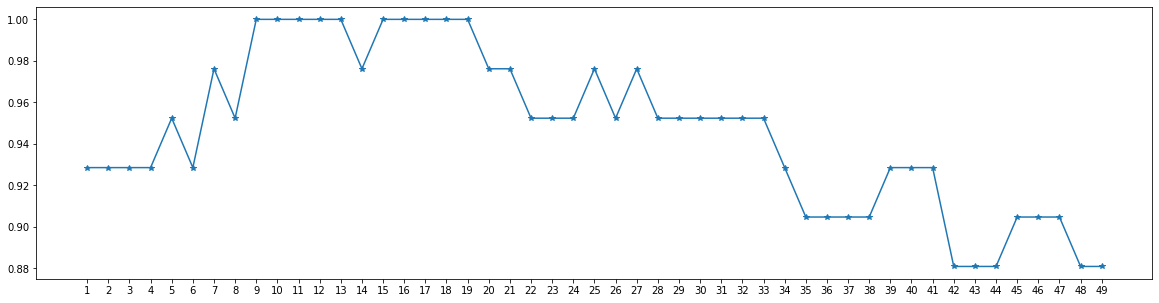

In [ ]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

Di atas adalah grafik yang menunjukkan akurasi untuk model KNN menggunakan nilai n yang berbeda.

### 3.4 Gaussian Naive Bayes:

Naive Bayes adalah algoritma klasifikasi untuk masalah klasifikasi biner (dua kelas) dan multi kelas. Teknik ini paling mudah dipahami ketika dijelaskan menggunakan nilai input biner atau kategoris.

Disebut naive bayes atau idiot bayes karena perhitungan probabilitas untuk setiap hipotesis disederhanakan untuk membuat perhitungannya dapat dilakukan. Daripada mencoba menghitung nilai dari setiap nilai atribut P(d1, d2, d3|h), mereka diasumsikan independen bersyarat dengan nilai target dan dihitung sebagai P(d1|h) * P(d2|H) dan seterusnya.

Ini adalah asumsi yang sangat kuat yang paling tidak mungkin dalam data nyata, yaitu bahwa atribut tidak berinteraksi. Namun demikian, pendekatan ini bekerja dengan sangat baik pada data di mana asumsi ini tidak berlaku.



![](https://miro.medium.com/max/1200/0*qFuHAV7Vd09064q-.jpeg)

# Latihan (17)

### Bangun model gaussian Naive Bayes dan akurasi nya

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 =f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[12  0  0]
 [ 0 14  1]
 [ 0  2 13]]
accuracy_Naive Bayes: 0.929
precision_Naive Bayes: 0.929
recall_Naive Bayes: 0.929
f1-score_Naive Bayes : 0.929


# Latihan (18)

### Bangun model gaussian Naive Bayes dan akurasi nya

### 3.5 Linear Support Vector Machine:

Support Vector Machine” (SVM) adalah algoritma pembelajaran mesin terawasi yang dapat digunakan untuk klasifikasi atau regresi. Namun, sebagian besar digunakan dalam masalah klasifikasi. Dalam algoritma SVM, kami memplot setiap item data sebagai titik dalam ruang n-dimensi (di mana n adalah jumlah fitur yang Anda miliki) dengan nilai setiap fitur menjadi nilai koordinat tertentu. Kemudian, kami melakukan klasifikasi dengan menemukan hyper-plane yang membedakan kedua kelas dengan sangat baik


![](https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/Margin.png)

# Latihan (19)

### Bangun model Linear Support Vector Machines dan akurasi nya

In [ ]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[12  0  0]
 [ 0 13  2]
 [ 0  2 13]]
accuracy_SVC: 0.905
precision_SVC: 0.905
recall_SVC: 0.905
f1-score_SVC : 0.905


# Latihan (20)

## Model mana yang terbaik ?

In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN',
              'Logistic Regression',
              'Naive Bayes',
              ' Support Vector Machine'],
    'Score': [ acc_knn,
              acc_log,
              acc_gaussian,
              acc_linear_svc],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_svc
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,Logistic Regression,96.94,95.24
1,KNN,96.94,92.86
2,Naive Bayes,96.94,92.86
3,Support Vector Machine,95.92,90.48


Seperti yang kita lihat Model terbaik diberikan oleh Logistic Regression (Akurasi 95%).

### Visualisasikan Hasil Akurasi

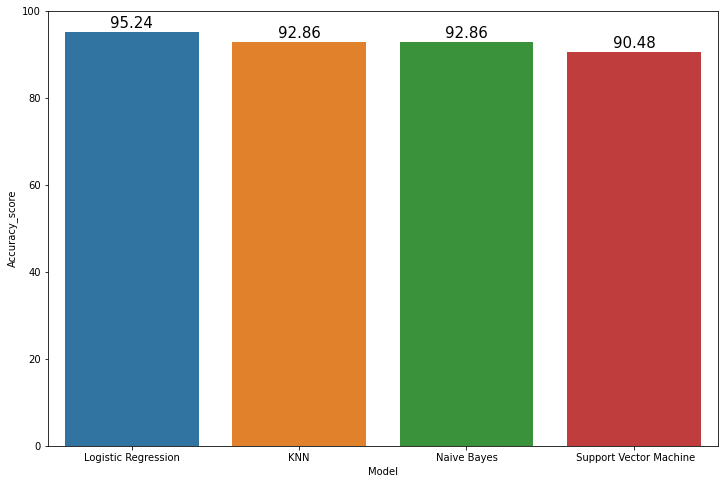

In [ ]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

### Hasil Observasi:
---

Hal ini seperti yang diharapkan dapat terlihat pada heatmap di atas bahwa korelasi antara Sepal Width dan Sepal Length sangat rendah sedangkan korelasi antara Petal Width and Petal Lengthl sangat tinggi. Dengan model terbaik diberikan oleh Logistic Regression dengan akurasi 95%

**Thank you!!**